In [1]:
# IMPORTATION DES LIBRAIRIES
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [2]:
# GENERATION DES DONNEES ALEATOIRES
# Fixer la graine pour la reproductibilité
np.random.seed(42)

# Générer des données aléatoires
data = np.random.rand(100, 5)
df = pd.DataFrame(data, columns=['Feature1', 'Feature2', 'Feature3', 'Feature4', 'Feature5'])
df #Affichage de la base de données

,Feature1,Feature2,Feature3,Feature4,Feature5
0,0.374540,0.950714,0.731994,0.598658,0.156019
1,0.155995,0.058084,0.866176,0.601115,0.708073
2,0.020584,0.969910,0.832443,0.212339,0.181825
3,0.183405,0.304242,0.524756,0.431945,0.291229
4,0.611853,0.139494,0.292145,0.366362,0.456070
...,...,...,...,...,...
95,0.992965,0.073797,0.553854,0.969303,0.523098
96,0.629399,0.695749,0.454541,0.627558,0.584314
97,0.901158,0.045446,0.280963,0.950411,0.890264
98,0.455657,0.620133,0.277381,0.188121,0.463698


In [3]:
# STANDARDISATION DES DONNEES
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)
scaled_data#Affichage des données standardisées


array([[-0.43980764,  1.42586997,  0.83279838,  0.26531037, -0.97165243],
       [-1.17820812, -1.56550301,  1.29022189,  0.27373034,  0.82899867],
       [-1.63571827,  1.49019785,  1.17522528, -1.05883432, -0.88747915],
       [-1.08559793, -0.74057924,  0.12633131, -0.30611515, -0.53063223],
       [ 0.36200154, -1.29268199, -0.66663598, -0.53090743,  0.00703416],
       [ 0.94760856, -1.09100778,  0.09046212,  0.24390879, -1.32903444],
       [ 0.34744595, -1.18869376, -1.44079007,  1.46574536,  1.66908817],
       [ 1.02606671, -0.73933419, -1.32958759,  0.55862488, -0.04488441],
       [-1.2929363 , -0.10072134, -1.54531965,  1.33013227, -0.63647264],
       [ 0.53319832, -0.71554978,  0.11034864,  0.08725319, -0.87759777],
       [ 1.57067051,  0.83746347,  1.54017732,  1.28045602,  0.46964536],
       [ 1.40947131, -1.46359712, -0.99444891, -1.63162525, -0.41940334],
       [-0.39204235, -0.85081057,  1.16259459, -0.5638415 , -0.56421054],
       [ 0.12834128, -1.28788857,  1.0

In [4]:
# EFFECTUER ACP
# Initialiser l'ACP pour réduire à 2 composantes principales
pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)

# Créer un DataFrame avec les composantes principales
pca_df = pd.DataFrame(data=principal_components, columns=['Principal Component 1', 'Principal Component 2'])
pca_df #Affichage de l'ACP réalisée


,Principal Component 1,Principal Component 2
0,1.485848,0.105171
1,0.090878,1.465542
2,2.802347,0.297502
3,0.549662,0.022572
4,-0.846820,-0.759975
...,...,...
95,-2.074297,-0.135355
96,-0.308443,0.260863
97,-2.851029,0.514611
98,0.349805,-0.566857


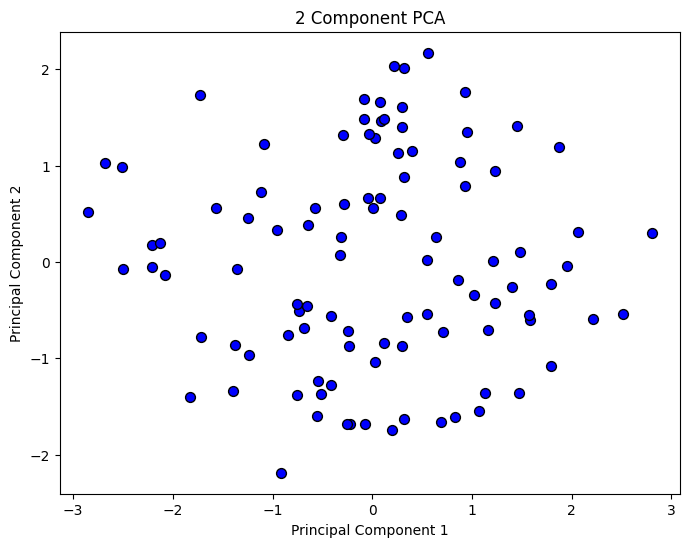

In [5]:
# VISUALISATION DES DONNEES
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['Principal Component 1'], pca_df['Principal Component 2'], c='blue', edgecolor='k', s=50)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2 Component PCA')
plt.show()

In [6]:
# INTERPRETER DES RESULTATS
explained_variance = pca.explained_variance_ratio_
print(f'Variance expliquée par la première composante principale: {explained_variance[0]:.2f}')
print(f'Variance expliquée par la deuxième composante principale: {explained_variance[1]:.2f}')


Variance expliquée par la première composante principale: 0.29
Variance expliquée par la deuxième composante principale: 0.23


## L'analyse PCA implique deux composantes principales, et les résultats clés suivants ont été obtenus :

1. **Variance expliquée** :
- La **première composante principale** explique **29 %** de la variance.
- La **deuxième composante principale** explique **23 %** de la variance.

Ces deux composantes représentent ensemble **52 %** de la variance totale dans l'ensemble de données. Cela signifie que plus de la moitié de la variabilité des données peut être capturée par ces deux dimensions, ce qui est assez significatif.

2. **Visualisation** :
- Un **diagramme de dispersion** des première et deuxième composantes principales est affiché, donnant une représentation visuelle de la distribution des données selon ces deux dimensions clés. Ce graphique permet d'identifier tout regroupement ou séparation de points de données, ce qui peut suggérer des modèles ou des relations sous-jacents.

### Interprétation :
- La **Première composante principale (PC1)** capture probablement la combinaison linéaire de variables la plus critique qui explique la plus grande variation dans vos données. Les caractéristiques avec des charges élevées sur PC1 sont les plus influentes pour distinguer les points de données le long de ce composant.
- **Le deuxième composant principal (PC2)** capture une autre dimension clé de la variabilité, orthogonale à PC1. Ensemble, ils fournissent une représentation dimensionnelle réduite qui conserve des informations importantes.

Cette réduction de dimensionnalité peut vous aider à mieux comprendre les principaux facteurs de votre ensemble de données et pourrait également simplifier la modélisation ultérieure.